In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import presence_of_element_located

import time
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

from PIL import Image
import io

In [85]:
caps = DesiredCapabilities().CHROME
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(chrome_options=chrome_options)
driver.set_window_size(1920,1600)
driver.get("http://www.youtube.com/watch?v=DeF41_coSX8")  # ok
#driver.get("https://www.youtube.com/watch?v=nISYp51fLNU")  # error

/home/adam/anaconda3/envs/megapixels/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


In [89]:
el_vid = driver.find_element_by_id('player-container-outer')
el_shelf = driver.find_element_by_id('ticket-shelf')
el_related = driver.find_element_by_id('related')
el_primary = driver.find_element_by_id('primary')
try:
  el_error = driver.find_element_by_id('error-screen')
  if el_error.location['x'] == 0 and el_error.location['width'] == 0:
    err = False
  else:
    err = True
except:
  err = False
  pass
print(err)

False


In [90]:
print(el_vid.size)
print(el_vid.location)
print(el_shelf.size, el_shelf.location)
print(el_related.size, el_related.location)
print(el_primary.size, el_primary.location)
print(el_error.size, el_error.location)

{'height': 720, 'width': 1280}
{'x': 100, 'y': 80}
{'height': 0, 'width': 1280} {'x': 100, 'y': 1101}
{'height': 2134, 'width': 402} {'x': 1404, 'y': 80}
{'height': 2158, 'width': 1304} {'x': 100, 'y': 56}
{'height': 0, 'width': 0} {'x': 0, 'y': 0}


In [96]:
margin_left = 24
margin_bottom = 24 if err else 0
box = (el_primary.location['x'] - margin_left, el_primary.location['y'], 
       el_primary.location['x'] + el_primary.size['width'], el_shelf.location['y'] + margin_bottom)
print(box)
im_crop = im.crop(box)

(76, 56, 1404, 1101)


In [97]:
im_crop.size

(1328, 1045)

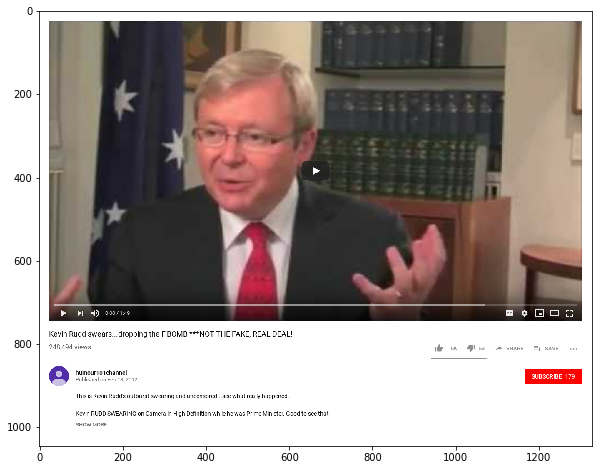

In [98]:
fig = plt.figure(figsize=(14,8))
plt.imshow(im_crop)

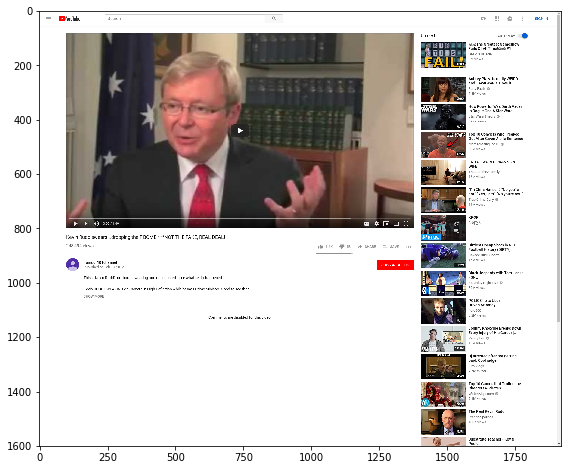

In [94]:
im_bytes = driver.get_screenshot_as_png()
im = Image.open(io.BytesIO(im_bytes))
fig = plt.figure(figsize=(14,8))
plt.imshow(im)

In [37]:
%reload_ext autoreload
%autoreload 2

from PIL import Image, ImageDraw
%matplotlib inline
import matplotlib.pyplot as plt

TypeError: Image data cannot be converted to float

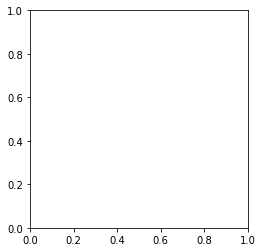

In [13]:
plt.imshow(im)

In [ ]:
time.sleep(4)  #
driver.get_screenshot_as_file('/mnt/ahprojects/tmp/screenshot.png') 
driver.quit()

In [102]:
from pathlib import Path
import os

In [101]:
fp_out = '/mnt/ahprojects/tmp/screenshot.png'
Path(fp_out).exists()

True

In [104]:
os.stat(fp_out).st_size / 1000  # kb

1101.74